In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
%matplotlib inline

In [ ]:
df=pd.read_csv('diabetes.csv')
df.head()


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            2      138             62             35        0  33.6   
1            0       84             82             31      125  38.2   
2            0      145              0              0        0  44.2   
3            0      135             68             42      250  42.3   
4            1      139             62             41      480  40.7   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.127   47        1  
1                     0.233   23        0  
2                     0.630   31        1  
3                     0.365   24        1  
4                     0.536   21        0

In [ ]:
df.describe()

Pregnancies      Glucose  BloodPressure  SkinThickness      Insulin  \
count  2000.000000  2000.000000    2000.000000    2000.000000  2000.000000   
mean      3.703500   121.182500      69.145500      20.935000    80.254000   
std       3.306063    32.068636      19.188315      16.103243   111.180534   
min       0.000000     0.000000       0.000000       0.000000     0.000000   
25%       1.000000    99.000000      63.500000       0.000000     0.000000   
50%       3.000000   117.000000      72.000000      23.000000    40.000000   
75%       6.000000   141.000000      80.000000      32.000000   130.000000   
max      17.000000   199.000000     122.000000     110.000000   744.000000   

               BMI  DiabetesPedigreeFunction          Age      Outcome  
count  2000.000000               2000.000000  2000.000000  2000.000000  
mean     32.193000                  0.470930    33.090500     0.342000  
std       8.149901                  0.323553    11.786423     0.474498  
min       0.000000                  0.078000    21.000000     0.000000  
25%      27.375000                  0.244000    24.000000     0.000000  
50%      32.300000                  0.376000    29.000000     0.000000  
75%      36.800000                  0.624000    40.000000     1.000000  
max      80.600000                  2.420000    81.000000     1.000000

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               2000 non-null   int64  
 1   Glucose                   2000 non-null   int64  
 2   BloodPressure             2000 non-null   int64  
 3   SkinThickness             2000 non-null   int64  
 4   Insulin                   2000 non-null   int64  
 5   BMI                       2000 non-null   float64
 6   DiabetesPedigreeFunction  2000 non-null   float64
 7   Age                       2000 non-null   int64  
 8   Outcome                   2000 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 140.8 KB


In [ ]:
df.isnull().values.any()

False

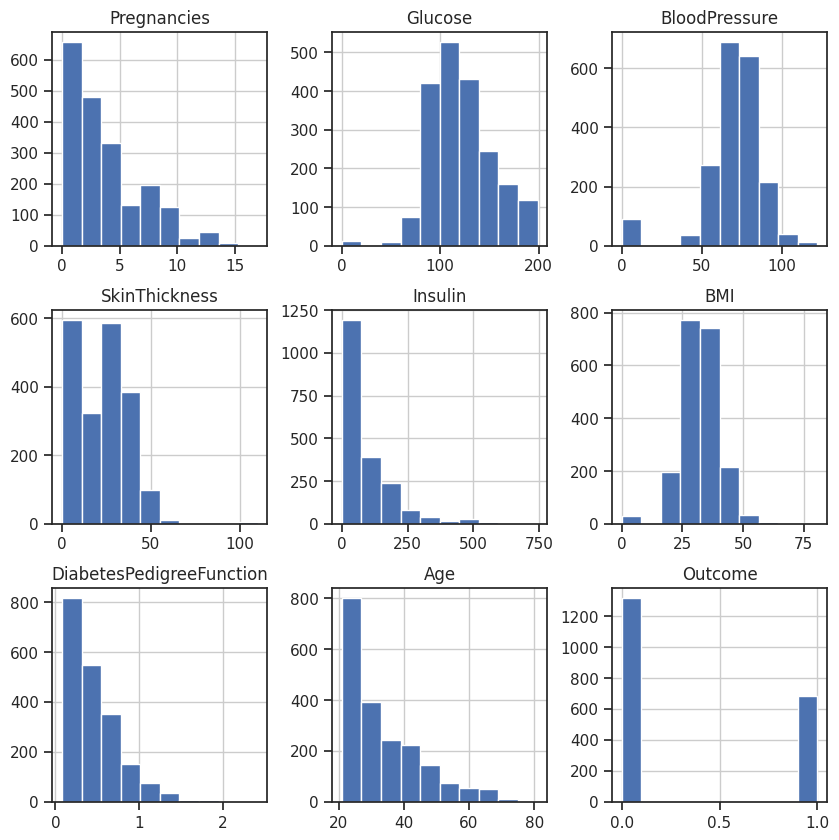

In [ ]:
df.hist(bins=10,figsize=(10,10))
plt.show()

<Axes: >

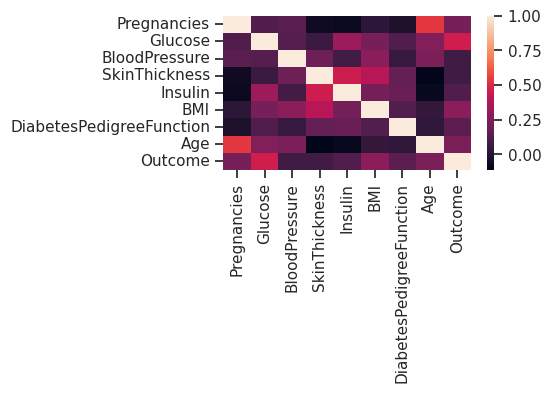

In [ ]:
sns.heatmap(df.corr())

<Axes: xlabel='count', ylabel='Outcome'>

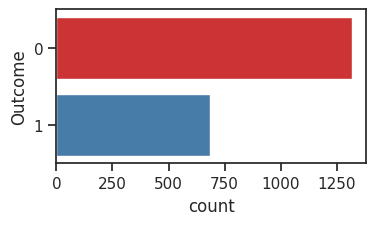

In [ ]:
sns.countplot(y=df['Outcome'],palette='Set1')

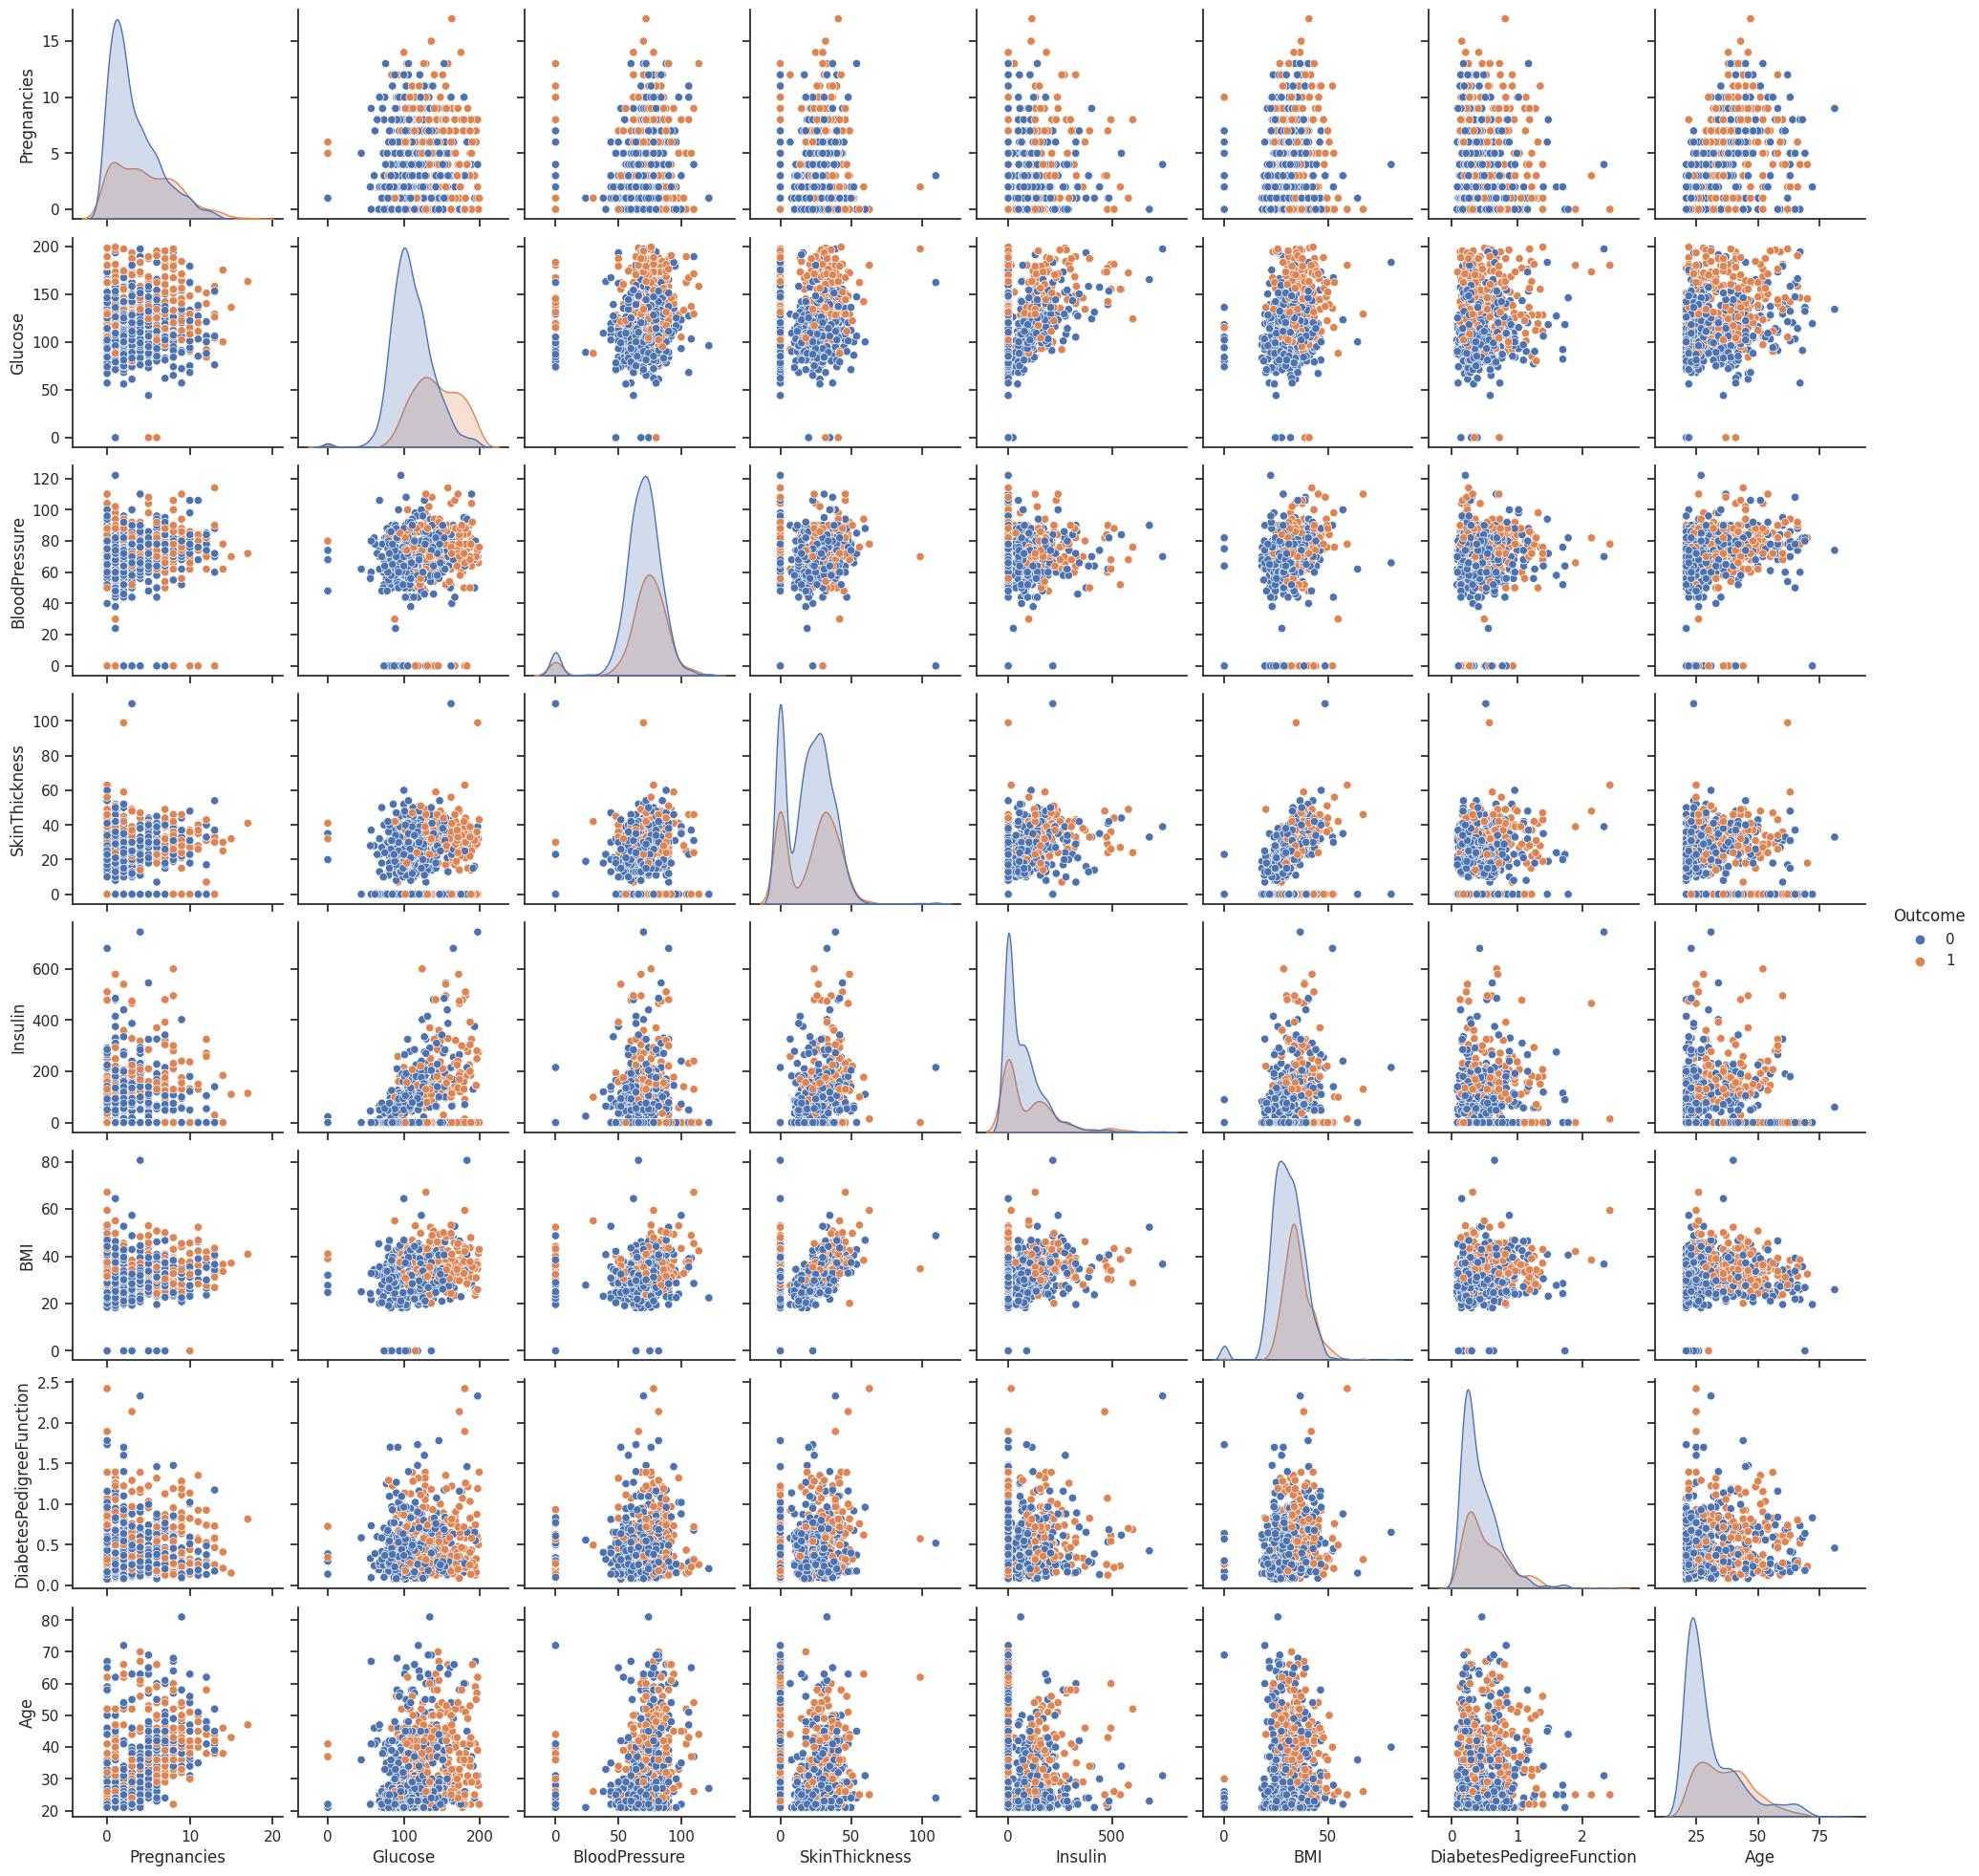

In [ ]:
sns.set(style="ticks")
sns.pairplot(df, hue="Outcome")

<Axes: >

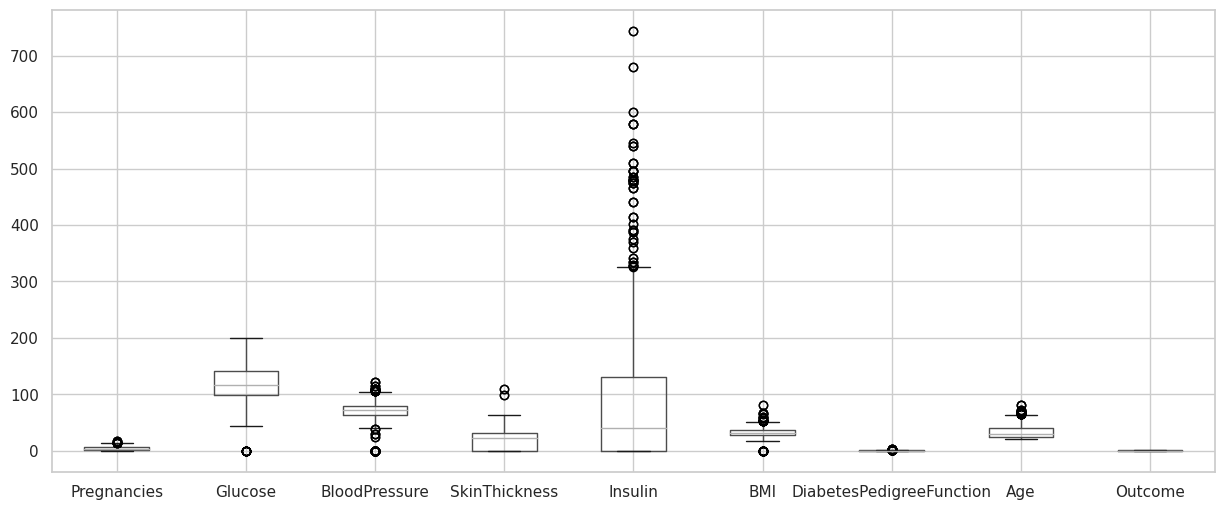

In [ ]:
sns.set(style="whitegrid")
df.boxplot(figsize=(15,6))

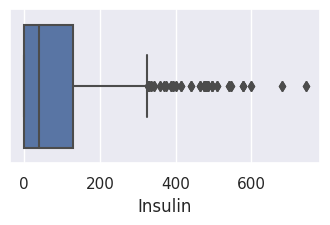

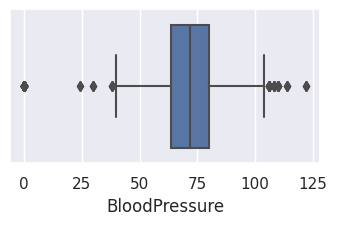

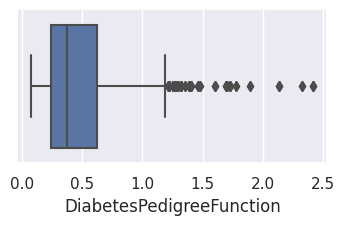

In [ ]:
#box plot
sns.set(style="whitegrid")

sns.set(rc={'figure.figsize':(4,2)})
sns.boxplot(x=df['Insulin'])
plt.show()
sns.boxplot(x=df['BloodPressure'])
plt.show()
sns.boxplot(x=df['DiabetesPedigreeFunction'])
plt.show()

In [ ]:
#outlier remove

Q1=df.quantile(0.25)
Q3=df.quantile(0.75)
IQR=Q3-Q1

print("---Q1--- \n",Q1)
print("\n---Q3--- \n",Q3)
print("\n---IQR---\n",IQR)

---Q1--- 
 Pregnancies                  1.000
Glucose                     99.000
BloodPressure               63.500
SkinThickness                0.000
Insulin                      0.000
BMI                         27.375
DiabetesPedigreeFunction     0.244
Age                         24.000
Outcome                      0.000
Name: 0.25, dtype: float64

---Q3--- 
 Pregnancies                   6.000
Glucose                     141.000
BloodPressure                80.000
SkinThickness                32.000
Insulin                     130.000
BMI                          36.800
DiabetesPedigreeFunction      0.624
Age                          40.000
Outcome                       1.000
Name: 0.75, dtype: float64

---IQR---
 Pregnancies                   5.000
Glucose                      42.000
BloodPressure                16.500
SkinThickness                32.000
Insulin                     130.000
BMI                           9.425
DiabetesPedigreeFunction      0.380
Age                 

In [ ]:
df_out = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
df.shape,df_out.shape

((2000, 9), (1652, 9))

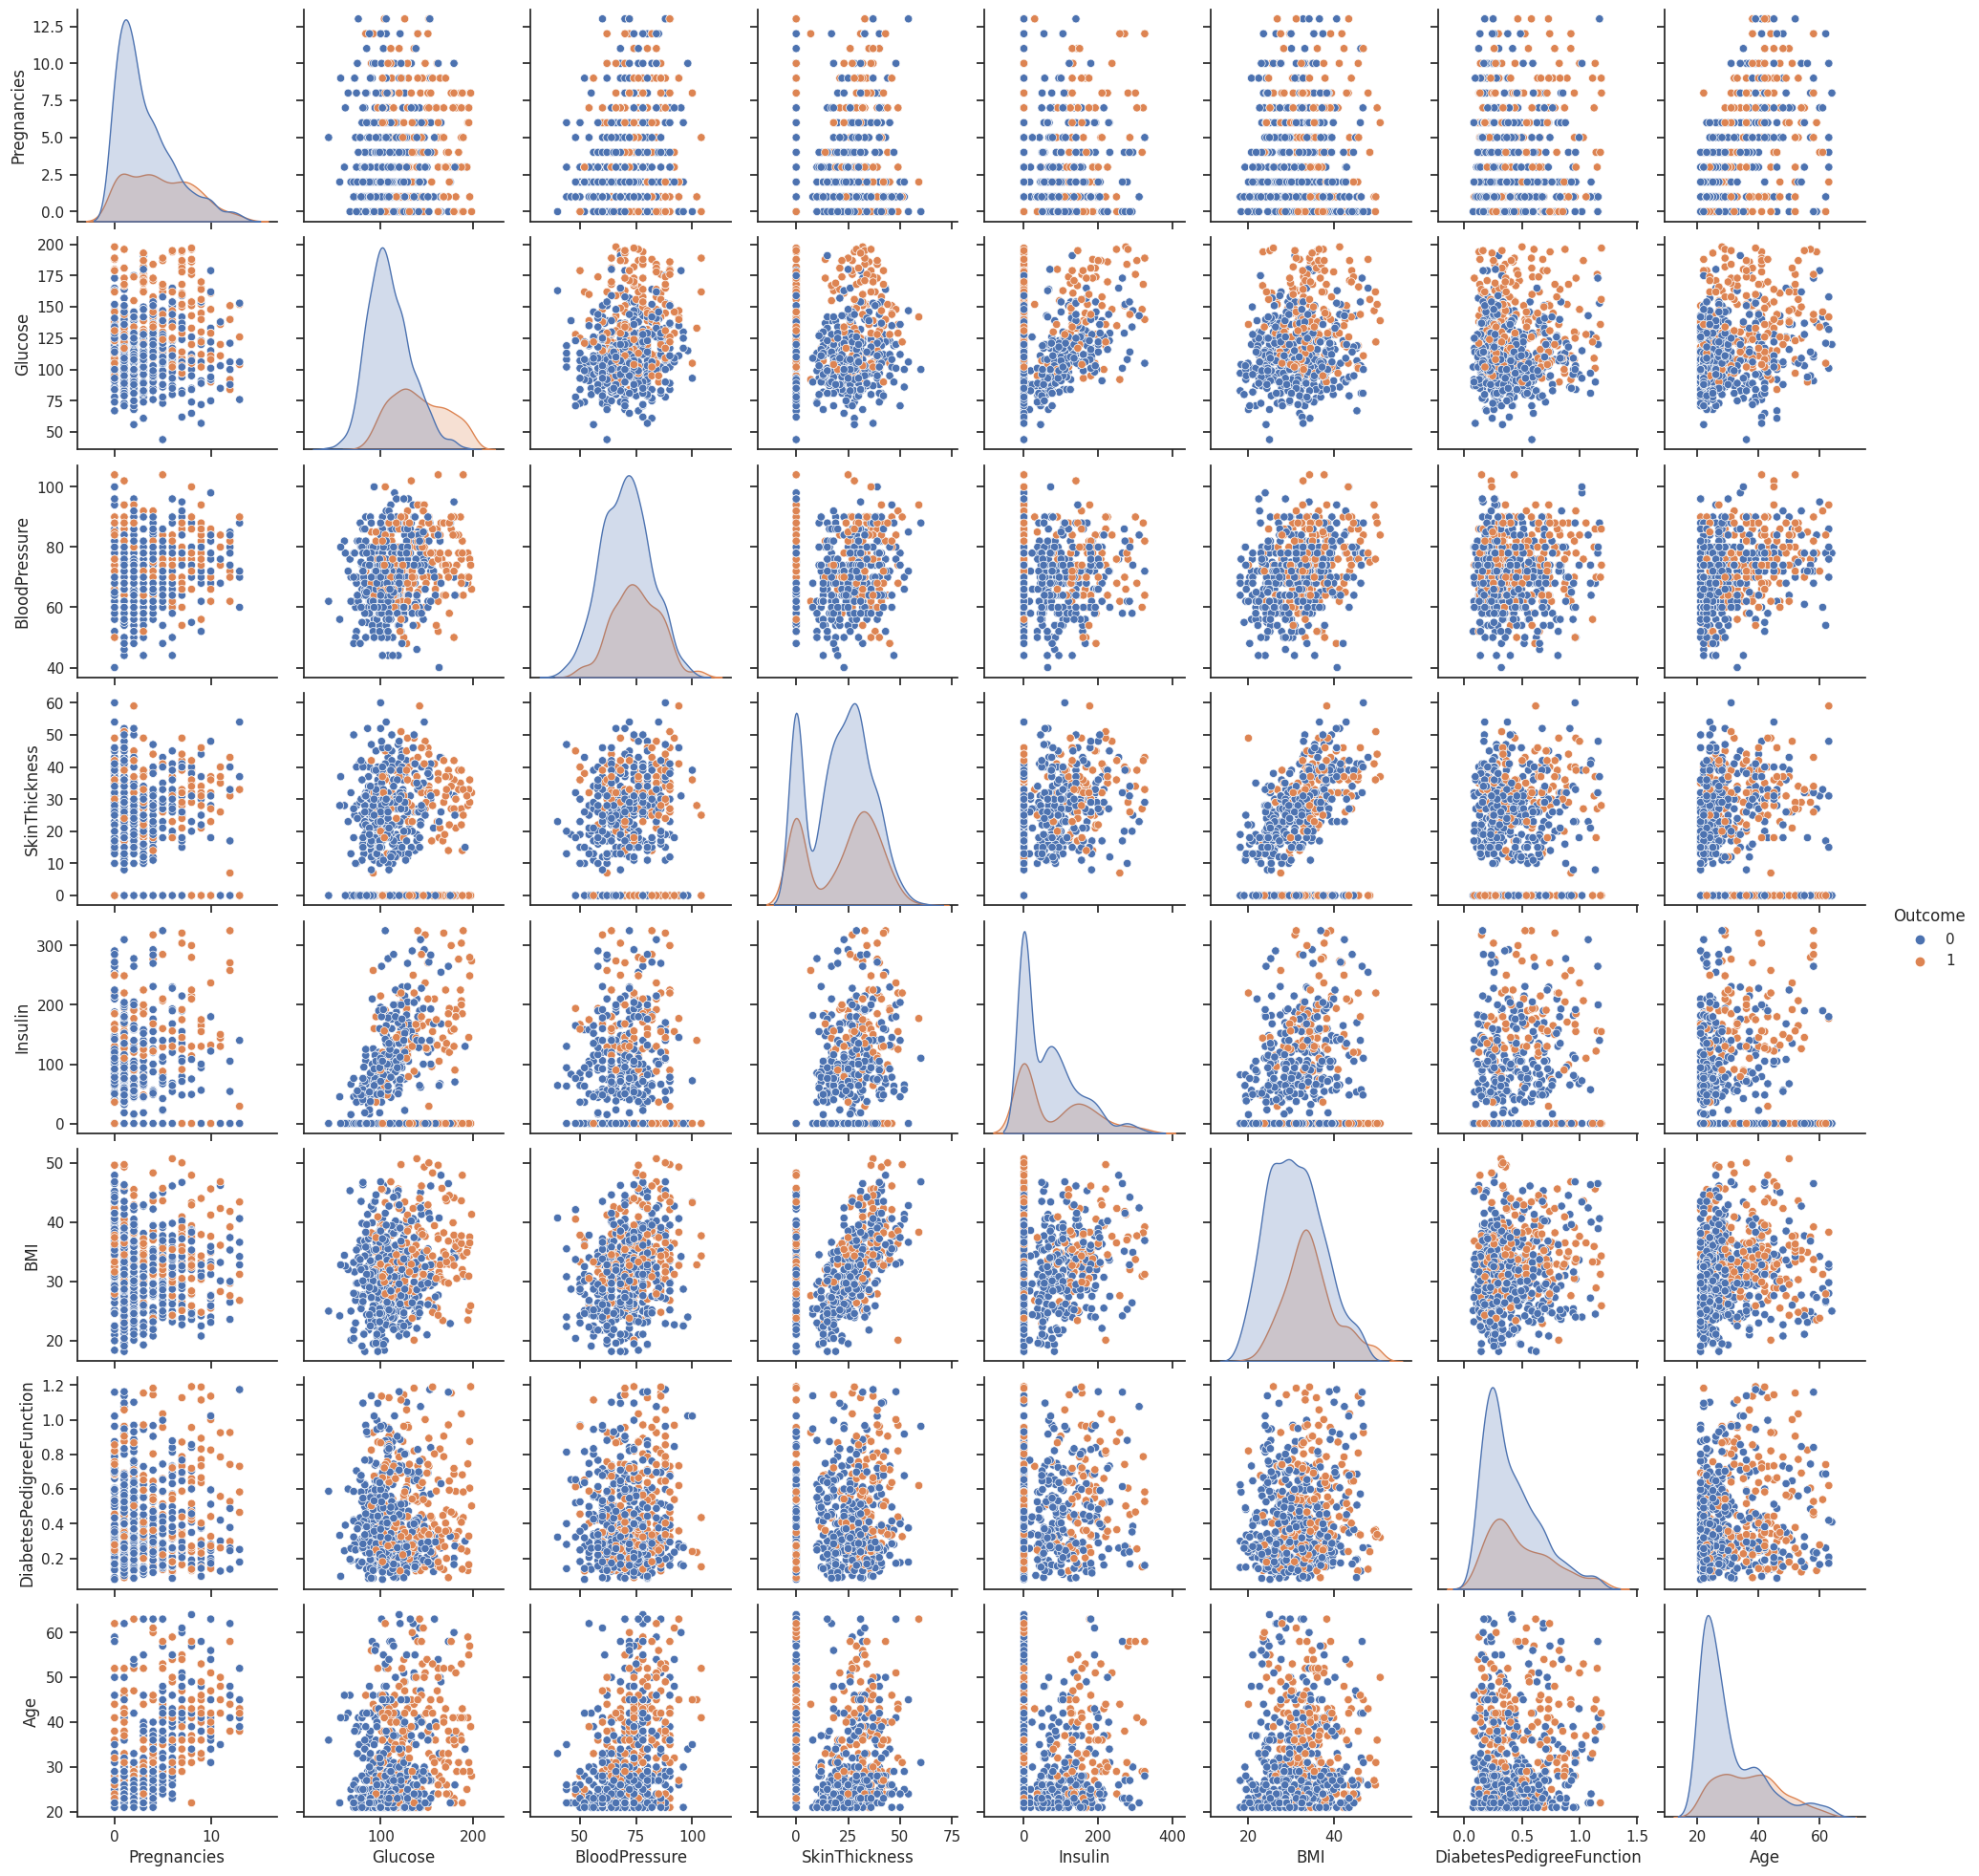

In [ ]:
#Scatter matrix after removing outlier
sns.set(style="ticks")
sns.pairplot(df_out, hue="Outcome")
plt.show()

In [ ]:
# extract features and targets
X=df_out.drop(columns=['Outcome'])
y=df_out['Outcome']

In [ ]:
#Splitting train test data 80 20 ratio
from sklearn.model_selection import train_test_split
train_X,test_X,train_y,test_y=train_test_split(X,y,test_size=0.3)

In [ ]:
train_X.shape,test_X.shape,train_y.shape,test_y.shape

((1156, 8), (496, 8), (1156,), (496,))

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score,make_scorer
from sklearn.model_selection import cross_validate

def tn(y_true, y_pred): return confusion_matrix(y_true, y_pred)[0, 0]
def fp(y_true, y_pred): return confusion_matrix(y_true, y_pred)[0, 1]
def fn(y_true, y_pred): return confusion_matrix(y_true, y_pred)[1, 0]
def tp(y_true, y_pred): return confusion_matrix(y_true, y_pred)[1, 1]

#cross validation purpose
scoring = {'accuracy': make_scorer(accuracy_score),'prec': 'precision'}
scoring = {'tp': make_scorer(tp), 'tn': make_scorer(tn),
           'fp': make_scorer(fp), 'fn': make_scorer(fn)}

def display_result(result):
    print("TP: ",result['test_tp'])
    print("TN: ",result['test_tn'])
    print("FN: ",result['test_fn'])
    print("FP: ",result['test_fp'])


Accuracy 0.7983870967741935 ROC 0.7362418503278658
TP:  [17 22 20 19 16 17 15 17 17 22]
TN:  [71 75 71 76 74 70 73 75 70 71]
FN:  [19 14 16 17 20 19 20 19 19 14]
FP:  [ 9  5  9  4  6 10  7  4  9  8]

Classification Report:

               precision    recall  f1-score   support

           0       0.82      0.91      0.86       339
           1       0.74      0.57      0.64       157

    accuracy                           0.80       496
   macro avg       0.78      0.74      0.75       496
weighted avg       0.79      0.80      0.79       496




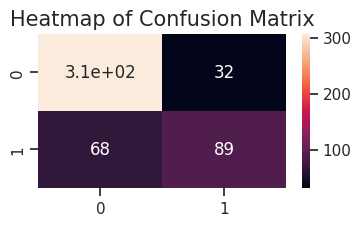

In [ ]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

acc=[]
roc=[]

clf=LogisticRegression(max_iter = 1000)
clf.fit(train_X,train_y)
y_pred=clf.predict(test_X)
#find accuracy
ac=accuracy_score(test_y,y_pred)
acc.append(ac)

#find the ROC_AOC curve
rc=roc_auc_score(test_y,y_pred)
roc.append(rc)
print("\nAccuracy {0} ROC {1}".format(ac,rc))

#cross val score
result=cross_validate(clf,train_X,train_y,scoring=scoring,cv=10)
display_result(result)
print()

print("Classification Report:\n\n",classification_report(test_y,y_pred))
print()
cm = confusion_matrix(test_y, y_pred)
plt.title('Heatmap of Confusion Matrix', fontsize = 15)
sns.heatmap(cm, annot = True)
plt.show()

In [ ]:
pd.DataFrame(data={'Actual':test_y,'Predicted':y_pred}).head()

Actual  Predicted
1415       0          0
164        1          0
930        0          0
1931       1          1
1423       0          0


Accuracy 0.8084677419354839 ROC 0.7436164815963023
TP:  [18 22 21 19 16 17 15 17 17 22]
TN:  [72 75 72 77 74 70 73 75 71 71]
FN:  [18 14 15 17 20 19 20 19 19 14]
FP:  [ 8  5  8  3  6 10  7  4  8  8]



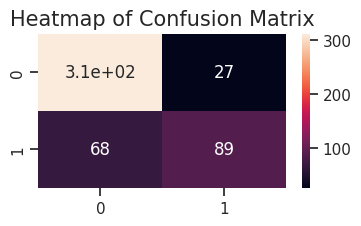

In [ ]:
#Support Vector Machine
from sklearn.svm import SVC

clf=SVC(kernel='linear')
clf.fit(train_X,train_y)
y_pred=clf.predict(test_X)
#find accuracy
ac=accuracy_score(test_y,y_pred)
acc.append(ac)

#find the ROC_AOC curve
rc=roc_auc_score(test_y,y_pred)
roc.append(rc)
print("\nAccuracy {0} ROC {1}".format(ac,rc))

#cross val score
result=cross_validate(clf,train_X,train_y,scoring=scoring,cv=10)
display_result(result)
print()

cm = confusion_matrix(test_y, y_pred)
plt.title('Heatmap of Confusion Matrix', fontsize = 15)
sns.heatmap(cm, annot = True)
plt.show()

In [ ]:
pd.DataFrame(data={'Actual':test_y,'Predicted':y_pred}).head()


Actual  Predicted
1415       0          0
164        1          0
930        0          0
1931       1          1
1423       0          0


Accuracy 0.8709677419354839 ROC 0.842342596245984
TP:  [21 24 24 24 21 27 22 24 26 26]
TN:  [73 69 63 71 75 66 69 66 73 71]
FN:  [15 12 12 12 15  9 13 12 10 10]
FP:  [ 7 11 17  9  5 14 11 13  6  8]

Classification Report:

               precision    recall  f1-score   support

           0       0.89      0.92      0.91       339
           1       0.82      0.76      0.79       157

    accuracy                           0.87       496
   macro avg       0.86      0.84      0.85       496
weighted avg       0.87      0.87      0.87       496




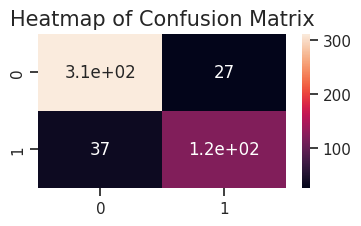

In [ ]:
#KNN

from sklearn.neighbors import KNeighborsClassifier

clf=KNeighborsClassifier(n_neighbors=3)
clf.fit(train_X,train_y)
y_pred=clf.predict(test_X)
#find accuracy
ac=accuracy_score(test_y,y_pred)
acc.append(ac)

#find the ROC_AOC curve
rc=roc_auc_score(test_y,y_pred)
roc.append(rc)
print("\nAccuracy {0} ROC {1}".format(ac,rc))

#cross val score
result=cross_validate(clf,train_X,train_y,scoring=scoring,cv=10)
display_result(result)
print()

print("Classification Report:\n\n",classification_report(test_y,y_pred))
print()
cm = confusion_matrix(test_y, y_pred)
plt.title('Heatmap of Confusion Matrix', fontsize = 15)
sns.heatmap(cm, annot = True)
plt.show()

In [ ]:
pd.DataFrame(data={'Actual':test_y,'Predicted':y_pred}).head()


Actual  Predicted
1415       0          0
164        1          1
930        0          0
1931       1          1
1423       0          0


Accuracy 0.9556451612903226 ROC 0.9487439640756816
TP:  [31 33 33 36 32 31 30 35 32 36]
TN:  [80 79 76 79 80 75 75 77 76 78]
FN:  [5 3 3 0 4 5 5 1 4 0]
FP:  [0 1 4 1 0 5 5 2 3 1]

Classification Report:

               precision    recall  f1-score   support

           0       0.97      0.97      0.97       339
           1       0.93      0.93      0.93       157

    accuracy                           0.96       496
   macro avg       0.95      0.95      0.95       496
weighted avg       0.96      0.96      0.96       496




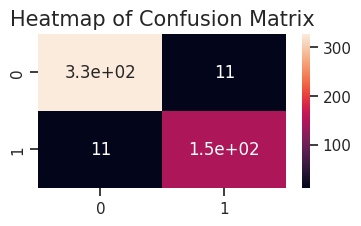

In [ ]:
#Random forest
from sklearn.ensemble import RandomForestClassifier

clf=RandomForestClassifier()
clf.fit(train_X,train_y)

y_pred=clf.predict(test_X)
#find accuracy
ac=accuracy_score(test_y,y_pred)
acc.append(ac)

#find the ROC_AOC curve
rc=roc_auc_score(test_y,y_pred)
roc.append(rc)
print("\nAccuracy {0} ROC {1}".format(ac,rc))

#cross val score
result=cross_validate(clf,train_X,train_y,scoring=scoring,cv=10)
display_result(result)
print()

print("Classification Report:\n\n",classification_report(test_y,y_pred))
print()
cm = confusion_matrix(test_y, y_pred)
plt.title('Heatmap of Confusion Matrix', fontsize = 15)
sns.heatmap(cm, annot = True)
plt.show()

In [ ]:
pd.DataFrame(data={'Actual':test_y,'Predicted':y_pred}).head()

Actual  Predicted
1415       0          0
164        1          1
930        0          0
1931       1          1
1423       0          0


Accuracy 0.7681451612903226 ROC 0.7329256148657535
TP:  [20 26 25 20 19 20 20 19 16 22]
TN:  [69 72 65 69 72 63 69 70 65 64]
FN:  [16 10 11 16 17 16 15 17 20 14]
FP:  [11  8 15 11  8 17 11  9 14 15]

Classification Report:

               precision    recall  f1-score   support

           0       0.83      0.83      0.83       339
           1       0.63      0.64      0.63       157

    accuracy                           0.77       496
   macro avg       0.73      0.73      0.73       496
weighted avg       0.77      0.77      0.77       496




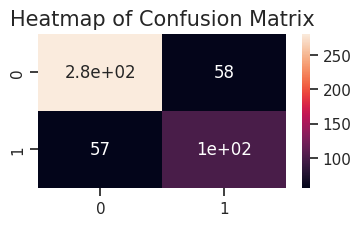

In [ ]:
#Naive Bayes Theorem
#import library
from sklearn.naive_bayes import GaussianNB

clf=GaussianNB()
clf.fit(train_X,train_y)
y_pred=clf.predict(test_X)
#find accuracy
ac=accuracy_score(test_y,y_pred)
acc.append(ac)

#find the ROC_AOC curve
rc=roc_auc_score(test_y,y_pred)
roc.append(rc)
print("\nAccuracy {0} ROC {1}".format(ac,rc))

#cross val score
result=cross_validate(clf,train_X,train_y,scoring=scoring,cv=10)
display_result(result)
print()

print("Classification Report:\n\n",classification_report(test_y,y_pred))
print()
cm = confusion_matrix(test_y, y_pred)
plt.title('Heatmap of Confusion Matrix', fontsize = 15)
sns.heatmap(cm, annot = True)
plt.show()

In [ ]:
pd.DataFrame(data={'Actual':test_y,'Predicted':y_pred}).head()

Actual  Predicted
1415       0          0
164        1          0
930        0          0
1931       1          1
1423       0          0


Accuracy 0.9314516129032258 ROC 0.9190763391766718
TP:  [31 33 32 31 29 28 26 32 31 34]
TN:  [80 79 75 75 79 70 77 77 74 78]
FN:  [5 3 4 5 7 8 9 4 5 2]
FP:  [ 0  1  5  5  1 10  3  2  5  1]

Classification Report:

               precision    recall  f1-score   support

           0       0.95      0.95      0.95       339
           1       0.90      0.89      0.89       157

    accuracy                           0.93       496
   macro avg       0.92      0.92      0.92       496
weighted avg       0.93      0.93      0.93       496




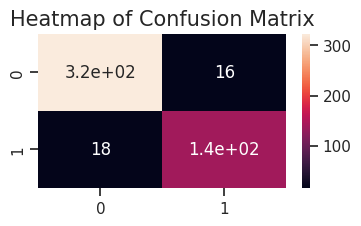

In [ ]:
#Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier
clf=GradientBoostingClassifier(n_estimators=100,learning_rate=0.2)
clf.fit(train_X,train_y)
y_pred=clf.predict(test_X)
#find accuracy
ac=accuracy_score(test_y,y_pred)
acc.append(ac)

#find the ROC_AOC curve
rc=roc_auc_score(test_y,y_pred)
roc.append(rc)
print("\nAccuracy {0} ROC {1}".format(ac,rc))

#cross val score
result=cross_validate(clf,train_X,train_y,scoring=scoring,cv=10)
display_result(result)
print()

print("Classification Report:\n\n",classification_report(test_y,y_pred))
print()
cm = confusion_matrix(test_y, y_pred)
plt.title('Heatmap of Confusion Matrix', fontsize = 15)
sns.heatmap(cm, annot = True)
plt.show()

In [ ]:
pd.DataFrame(data={'Actual':test_y,'Predicted':y_pred}).head()

Actual  Predicted
1415       0          0
164        1          1
930        0          0
1931       1          1
1423       0          1

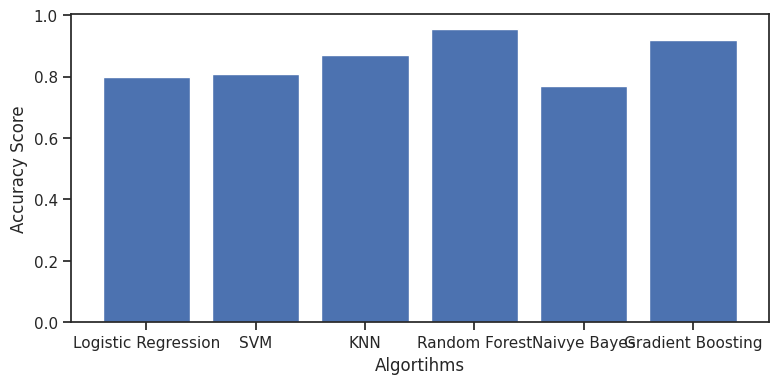

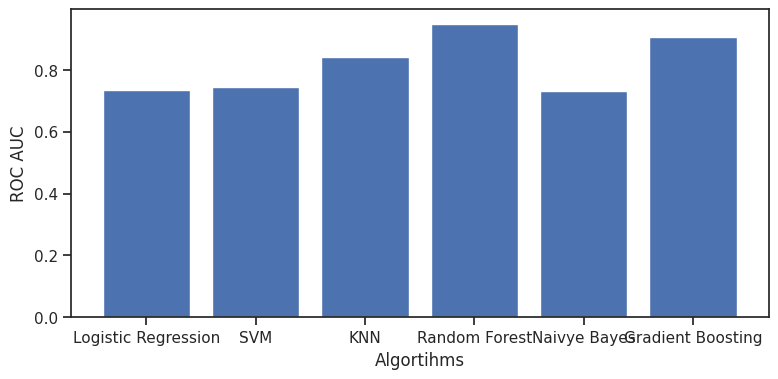

In [ ]:
ax=plt.figure(figsize=(9,4))
plt.bar(['Logistic Regression','SVM','KNN','Random Forest','Naivye Bayes','Gradient Boosting'],acc,label='Accuracy')
plt.ylabel('Accuracy Score')
plt.xlabel('Algortihms')
plt.show()

ax=plt.figure(figsize=(9,4))
plt.bar(['Logistic Regression','SVM','KNN','Random Forest','Naivye Bayes','Gradient Boosting'],roc,label='ROC AUC')
plt.ylabel('ROC AUC')
plt.xlabel('Algortihms')
plt.show()